In [1]:
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
excelfile = "AllPlayers.xlsx"
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy as sci
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.ticker as tkr
import numpy as np
import matplotlib.cm as cm

In [2]:
df = pd.read_excel(excelfile)

In [3]:
df.columns = ['Name','Team','Position','Age','GP','MPG','Min%','USG%','Turnover Rate','FTA','FT%','2PA','2P%','3PA','3P%','Effective Shooting%','True Shooting%','PPG','RPG','Total Rebound%','Assist Per Game','AST%','SPG','BPG','Turnovers Per Game','Versatality Index','Offensive Rating','Defensive Rating']


In [4]:
over25GP = df.loc[df.GP>=25]

In [5]:
players_df = df.groupby('Name',as_index=False).mean()

In [6]:
over25GP_df = over25GP.groupby('Name',as_index=False).mean()

# Merging

In [7]:
loadPlayerSalary = 'PlayerSalaries.xlsx'
playerSalary = pd.read_excel(loadPlayerSalary)

In [8]:
data_df = pd.merge(over25GP_df,playerSalary,how='left',on=['Name','Name'])
# data_df.to_excel('Player_Data.xlsx')

In [9]:
draymond = data_df.loc[data_df['Name']=='Draymond Green']
frankKaminsky = data_df.loc[data_df['Name']=='Frank Kaminsky']
jeramiGrant = data_df.loc[data_df['Name']=='Jerami Grant']
nicBatum = data_df.loc[data_df['Name']=='Nicolas Batum']
nikolaMirotic = data_df.loc[data_df['Name']=='Nikola Mirotic']

Here is a plot showing the correlation between Minutes Per Game and Points Per Game. Obvious trend

Text(10,20,'Frank Kaminsky')

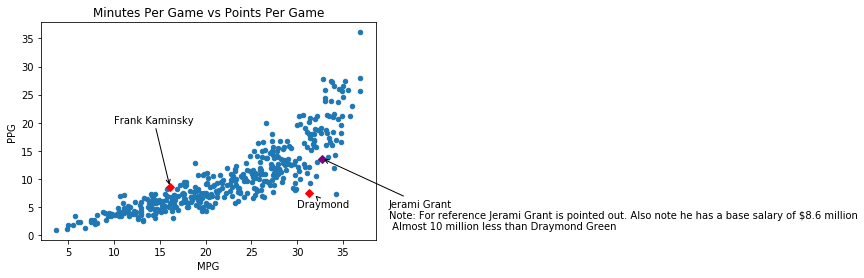

In [10]:
data_df.plot('MPG','PPG',kind='scatter')
plt.title('Minutes Per Game vs Points Per Game')
plt.plot(draymond['MPG'],draymond['PPG'],marker='D',color='red')
plt.plot(jeramiGrant['MPG'],jeramiGrant['PPG'],marker='D',color='purple')
plt.plot(frankKaminsky['MPG'],frankKaminsky['PPG'],marker='D',color='red')
plt.annotate('Draymond',xy=(32,7),xytext=(30,5),arrowprops=dict(arrowstyle='->'))
plt.annotate('Jerami Grant',xy=(jeramiGrant['MPG'],jeramiGrant['PPG']),xytext=(40,5),arrowprops=dict(arrowstyle='->'))
plt.text(40,1,'Note: For reference Jerami Grant is pointed out. Also note he has a base salary of $8.6 million\n Almost 10 million less than Draymond Green')
plt.annotate('Frank Kaminsky',xy=(frankKaminsky['MPG'],frankKaminsky['PPG']),xytext=(10,20),arrowprops=dict(arrowstyle='->'))


Frank Kaminsky averaged more points while averaging almost half the amount of minutes

"Draymond is more of a defensive player"

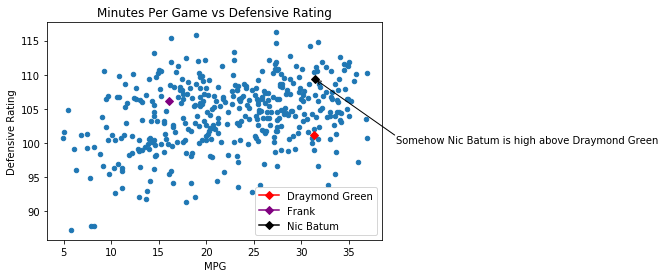

In [11]:
data_df.plot('MPG','Defensive Rating',kind='scatter')
plt.plot(draymond['MPG'],draymond['Defensive Rating'],marker='D',color='red',label='Draymond Green')
plt.plot(frankKaminsky['MPG'],frankKaminsky['Defensive Rating'],marker='D',color='purple',label='Frank')
plt.plot(nicBatum['MPG'],nicBatum['Defensive Rating'],marker='D',color='black',label='Nic Batum')
plt.annotate('',xy=(nicBatum['MPG'],nicBatum['Defensive Rating']),xytext=(40,101),arrowprops=dict(arrowstyle='->'))
plt.text(40,100,'Somehow Nic Batum is high above Draymond Green')
plt.title('Minutes Per Game vs Defensive Rating')
plt.legend()

This shows that his level of value added does not justify his minutes playing

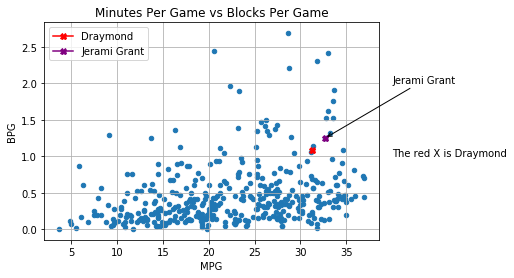

In [12]:
data_df.plot('MPG','BPG',kind='scatter')
plt.plot(draymond['MPG'],draymond['BPG'],marker='X',color='red',label='Draymond')
plt.plot(jeramiGrant['MPG'],jeramiGrant['BPG'],marker='X',color='purple',label="Jerami Grant")
plt.annotate('Jerami Grant',xy=(32.700,1.25),xytext=(40,2),arrowprops=dict(arrowstyle='->'))
plt.title('Minutes Per Game vs Blocks Per Game')
plt.text(40,1,'The red X is Draymond')
plt.legend()
plt.grid()

In [13]:
goldenState = over25GP.loc[over25GP['Team'] == 'Gol']

Text(0.5,1,'Turnover Rate for Golden State')

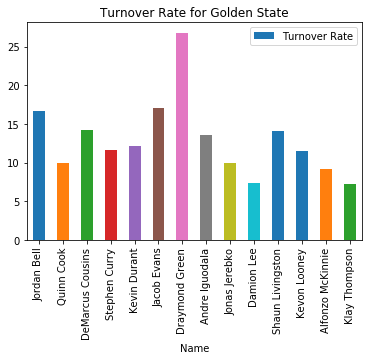

In [14]:
goldenState.plot('Name','Turnover Rate',kind='bar')
plt.title('Turnover Rate for Golden State')

In fact, Draymond Green leads the league in Turnover Rate 

In [15]:
data_df.sort_values('Turnover Rate',ascending=False).head()

,Name,Age,GP,MPG,Min%,USG%,Turnover Rate,FTA,FT%,2PA,...,SPG,BPG,Turnovers Per Game,Versatality Index,Offensive Rating,Defensive Rating,2018-2019,2019-2020,2020-2021,2021-2022
103,Draymond Green,29.10,66.0,31.3,65.2,13.1,26.8,91.0,0.692,257.0,...,1.44,1.08,2.56,9.2,107.9,101.2,17469565,18539130.0,0,0.0
340,Sindarius Thornwell,24.40,64.0,4.9,10.2,11.3,23.8,34.0,0.735,34.0,...,0.22,0.11,0.31,4.9,87.9,100.8,1378242,1618520.0,0,0.0
381,Tyson Chandler,36.52,48.0,16.4,34.1,8.0,23.0,69.0,0.594,86.0,...,0.40,0.50,0.73,5.3,122.7,99.5,13585000,0.0,0,0.0
311,Rajon Rondo,33.13,46.0,29.8,62.0,17.4,22.1,36.0,0.639,290.0,...,1.20,0.15,2.76,9.8,100.5,105.2,9000000,0.0,0,0.0
200,Jose Calderon,37.54,48.0,13.2,27.4,10.9,21.9,11.0,0.818,63.0,...,0.33,0.06,0.73,5.9,102.7,103.4,2393887,0.0,0,0.0


Text(0.5,1,'Usage Percentage for Golden State')

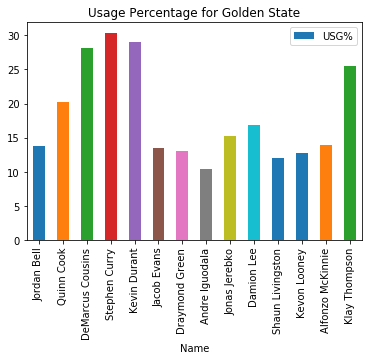

In [16]:
goldenState.plot('Name','USG%',kind='bar')
plt.title('Usage Percentage for Golden State')

Text(0.5,1,'Minutes Per Game vs Rebounds Per Game')

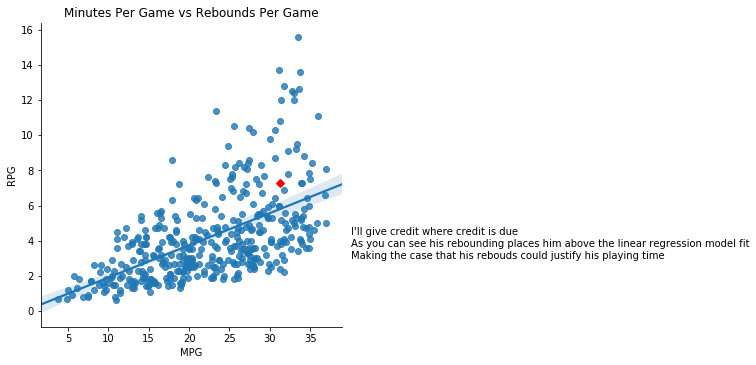

In [17]:
sns.lmplot(data=data_df, x="MPG", y="RPG")
plt.plot(draymond['MPG'],draymond['RPG'],marker='D',color='red')
plt.text(40,3,"I'll give credit where credit is due\nAs you can see his rebounding places him above the linear regression model fit\nMaking the case that his rebouds could justify his playing time")
plt.title("Minutes Per Game vs Rebounds Per Game")


In [18]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5,1,'Steals Per Game')

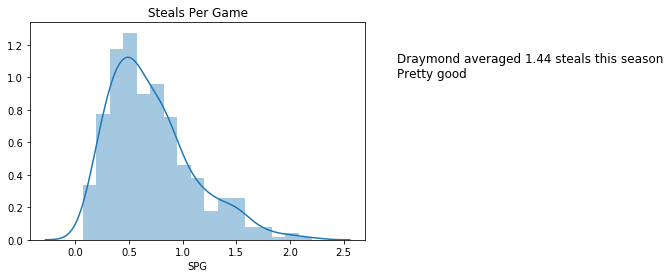

In [19]:
sns.distplot(data_df['SPG'])
plt.text(3,1,"Draymond averaged 1.44 steals this season\nPretty good", size=12)
plt.title('Steals Per Game')

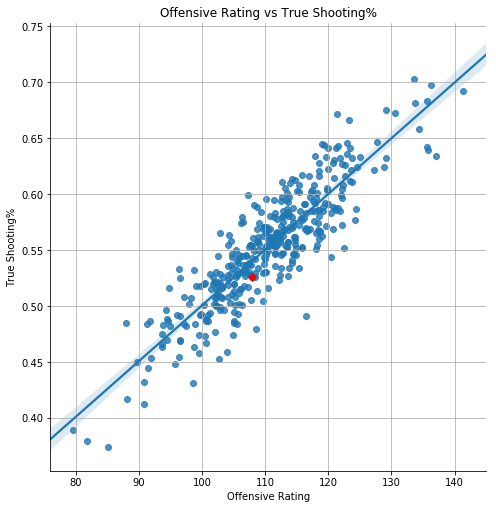

In [20]:
sns.lmplot(x='Offensive Rating', y='True Shooting%',data=data_df,size=7)
plt.plot(draymond['Offensive Rating'],draymond['True Shooting%'],marker='D',color='red')
plt.title('Offensive Rating vs True Shooting%')
plt.grid()

You can see that Draymond Green is basically just behind average on this offensive graph

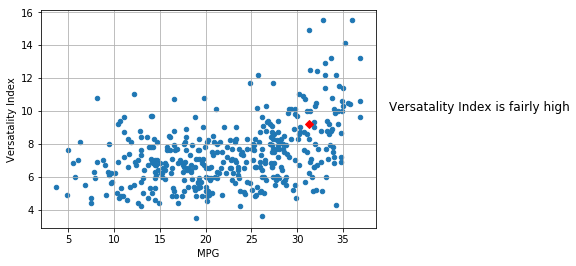

In [21]:
data_df.plot('MPG','Versatality Index',kind='scatter')
plt.plot(draymond['MPG'],draymond['Versatality Index'],marker='D',color='red')
plt.text(40,10,"Versatality Index is fairly high",size=12)
plt.grid()

                                        Now lets talk about money

I created a dataframe with players that have played in 25 games or more to have fewer outliers

In [22]:
traeYoung = data_df.loc[data_df['Name']=='Trae Young']

In [23]:
ageBins = [15,20,24.99,30,35,40,45]
ageLabels = ['Younger than 20','20-24','25-30','30-35','35-40','Older than 40']
data_df['Age Group'] = pd.cut(data_df['Age'],ageBins,labels=ageLabels)

In [24]:
data_df.sort_values('Age',ascending=True).head(15)

,Name,Age,GP,MPG,Min%,USG%,Turnover Rate,FTA,FT%,2PA,...,BPG,Turnovers Per Game,Versatality Index,Offensive Rating,Defensive Rating,2018-2019,2019-2020,2020-2021,2021-2022,Age Group
169,Jaren Jackson Jr.,19.57,58.0,26.1,54.4,22.8,12.7,197.0,0.766,448.0,...,1.41,1.69,6.4,108.2,96.9,5922720,6936360.0,7266600,9192249.0,Younger than 20
225,Kevin Knox,19.67,75.0,28.8,59.9,22.4,10.2,226.0,0.717,551.0,...,0.32,1.53,5.5,93.7,109.4,3744840,4385640.0,4594680,5853622.0,Younger than 20
374,Troy Brown Jr.,19.70,52.0,14.0,29.2,16.5,10.5,47.0,0.681,165.0,...,0.10,0.58,7.8,105.0,109.4,2752680,3223680.0,3377160,5177186.0,Younger than 20
387,Wendell Carter Jr.,19.99,44.0,25.2,52.5,19.1,13.6,112.0,0.795,338.0,...,1.34,1.50,8.0,107.9,100.7,4446840,5208000.0,5455920,6929018.0,Younger than 20
265,Marvin Bagley III,20.08,62.0,25.3,52.7,24.2,10.7,262.0,0.691,610.0,...,0.95,1.58,7.6,111.1,106.4,7314960,8567040.0,8975040,11326500.0,20-24
250,Luka Doncic,20.12,72.0,32.2,67.1,30.5,14.9,485.0,0.713,672.0,...,0.35,3.42,12.4,106.9,105.1,6569040,7693200.0,8059680,10187435.0,20-24
55,Collin Sexton,20.27,82.0,31.8,66.2,25.2,12.4,255.0,0.839,910.0,...,0.07,2.27,6.6,101.8,114.8,4073760,4771080.0,4998360,6357913.0,20-24
368,Trae Young,20.56,81.0,30.9,64.4,28.4,17.6,414.0,0.829,775.0,...,0.19,3.80,10.7,107.5,114.2,5363280,6281280.0,6580320,8337265.0,20-24
203,Josh Okogie,20.61,74.0,23.7,49.5,15.4,9.8,162.0,0.728,293.0,...,0.45,0.85,5.1,100.9,106.6,2163600,2533920.0,2654520,4093269.0,20-24
224,Kevin Huerter,20.62,75.0,27.3,56.9,15.7,13.8,56.0,0.732,304.0,...,0.33,1.45,6.6,105.5,111.9,2250960,2636280.0,2761920,4253357.0,20-24


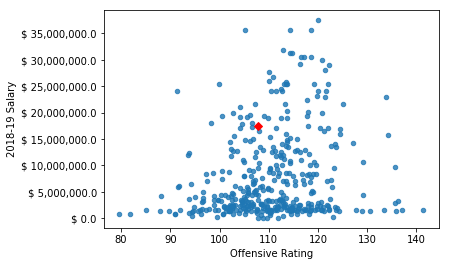

In [25]:
salaryVsOffensive = data_df.plot('Offensive Rating','2018-2019',kind='scatter',alpha=0.8)
plt.plot(draymond['Offensive Rating'],draymond['2018-2019'],marker='D',color='red')
salaryVsOffensive.set_ylabel('2018-19 Salary')
salaryVsOffensive.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'$ {:,}'.format(x)))

You can see here most players that have an offensive rating higher than Draymond Green are getting paid tremendously less. 

In [26]:
rodneyHood = data_df.loc[data_df['Name']=='Rodney Hood']

Text(125,1,'')

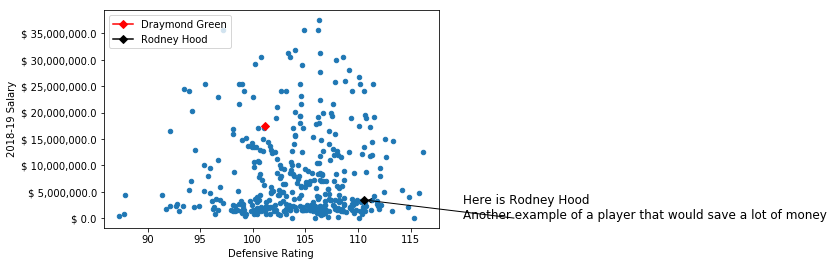

In [27]:
salaryVsDefensive = data_df.plot('Defensive Rating','2018-2019',kind='scatter')
plt.plot(draymond['Defensive Rating'],draymond['2018-2019'],marker='D',color='red',label='Draymond Green')
plt.plot(rodneyHood['Defensive Rating'],rodneyHood['2018-2019'],marker='D',color='black',label='Rodney Hood')
salaryVsDefensive.set_ylabel('2018-19 Salary')
salaryVsDefensive.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'$ {:,}'.format(x)))
plt.text(120,1,"Here is Rodney Hood\nAnother example of a player that would save a lot of money",size=12)
plt.legend()
plt.annotate('',xy=(rodneyHood['Defensive Rating'],rodneyHood['2018-2019']),xytext=(125,1),arrowprops=dict(arrowstyle='->'))


Even on the defensive side the majority of these players that are higher than him defensively are getting paid way less on average

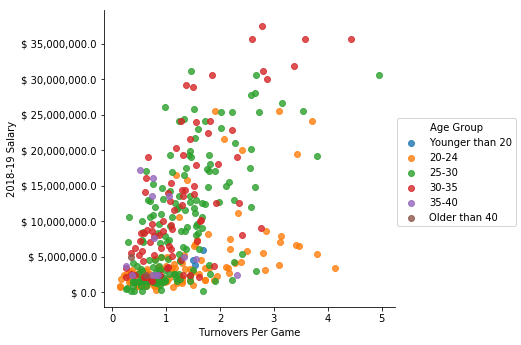

In [28]:
turnoversPerWithSalary = sns.lmplot('Turnovers Per Game','2018-2019',data=data_df,fit_reg=False,hue='Age Group')
turnoversPerWithSalary.ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'$ {:,}'.format(x)))
turnoversPerWithSalary.set_ylabels('2018-19 Salary')

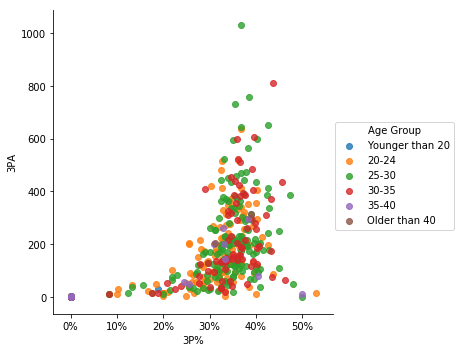

In [29]:
threesAttemptedWithAge = sns.lmplot('3P%','3PA',data=data_df,fit_reg=False,hue='Age Group')
threesAttemptedWithAge.ax.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'{:.0%}'.format(x)))

Text(0,0.5,'2018-19 Salary')

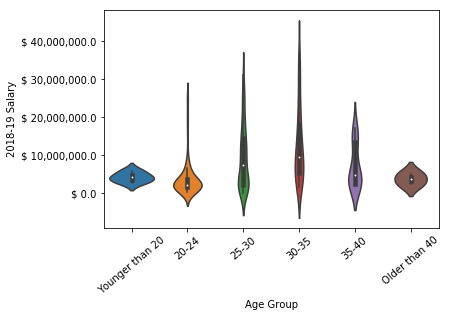

In [30]:
ageVsWage = sns.violinplot(x='Age Group',y='2018-2019',data=data_df)
plt.xticks(rotation=40)
ageVsWage.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'$ {:,}'.format(x)))
plt.ylabel('2018-19 Salary')

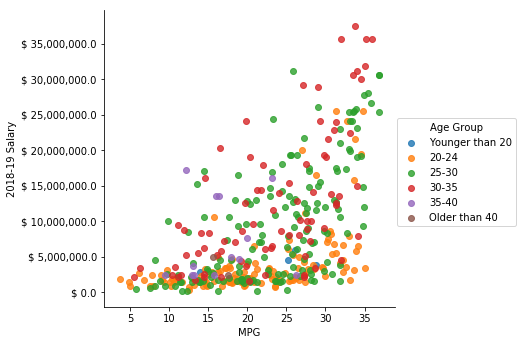

In [31]:
minsPerGameWithSalary = sns.lmplot('MPG','2018-2019',data=data_df,fit_reg=False,hue='Age Group')
minsPerGameWithSalary.ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'$ {:,}'.format(x)))
minsPerGameWithSalary.set_ylabels('2018-19 Salary')

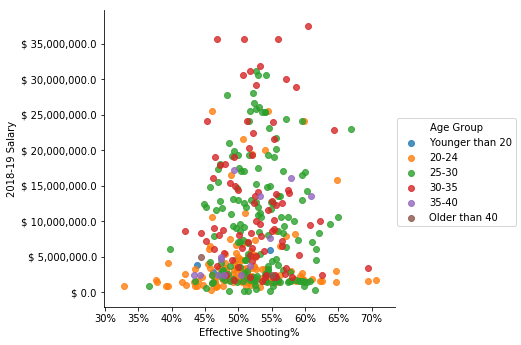

In [32]:
shootingPercentWithSalary = sns.lmplot('Effective Shooting%','2018-2019',data=data_df,fit_reg=False,hue='Age Group')
shootingPercentWithSalary.ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'$ {:,}'.format(x)))
shootingPercentWithSalary.set_ylabels('2018-19 Salary')
shootingPercentWithSalary.ax.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'{:.0%}'.format(x)))

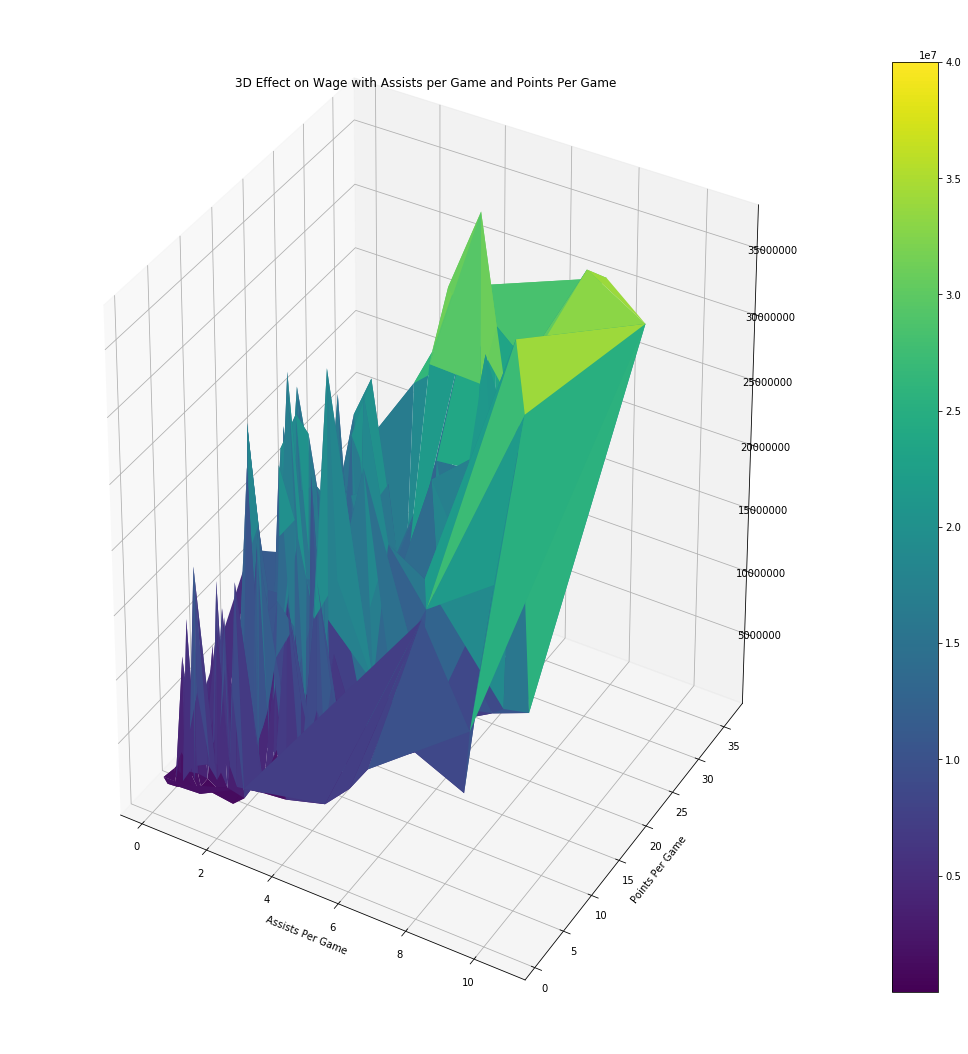

In [33]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(data_df['Assist Per Game'],data_df['PPG'],data_df['2018-2019'],cmap=plt.cm.viridis,vmin=5000,vmax=40000000)
fig.colorbar(surf,shrink=.9,aspect=20)
ax.view_init(30)
ax.ticklabel_format(style='plain')
plt.title('3D Effect on Wage with Assists per Game and Points Per Game')
plt.xlabel('Assists Per Game')
plt.ylabel('Points Per Game')
plt.tight_layout(pad=2,w_pad=1)

Looking at the effect of assists and points on wage then it could be argued that someone averaging 7, 7, and 7 does not justify the amount of pay

When it comes to the assists category I have seen great passes and anticipation of where his teammates will be, but he is also passing to Stephen Curry, Klay Tompson and Kevin Durant. A lot of players could make a straight chest pass to these guys and let them rain threes even with a defender directly in front of them. Defenses will have their main focus on these three players, making it easier for Draymond backdoor cuts.

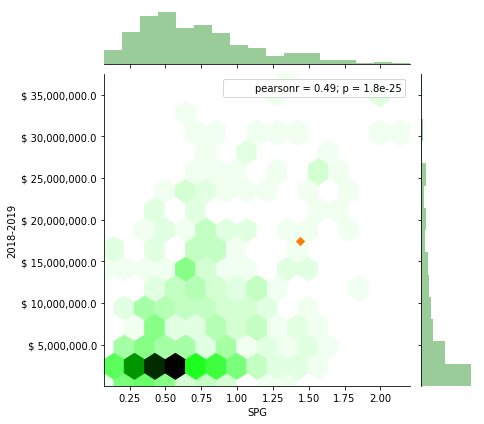

In [34]:
stealsVsSalary = sns.jointplot(data=data_df,x='SPG',y='2018-2019',kind='hex',color='green')
stealsVsSalary.ax_joint.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, loc:'$ {:,}'.format(x)))
stealsVsSalary.ax_joint.plot(draymond['SPG'],draymond['2018-2019'],marker='D')

He does stand out from the norm on steals per game